<a href="https://colab.research.google.com/github/Crypt-Cesar-Labs/Alexa_glenn_domans/blob/main/codigo_tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El sistema es estable

Factor de amortiguamiento es
Cs = 8.54092962068536

El sistema esta sobreamortiguado

Frecuencia natural
Wn = 4.92355352467553

La Constante de tiempo es
T = 0.02378023780237802

Tiempo de estabilizacion
Ts = 0.09512095120951208

Sobrepaso maximo
(-0.14221384373075746-0.003094663588619299j)

Tiempo pico
Tp = 0.07522521180717308j


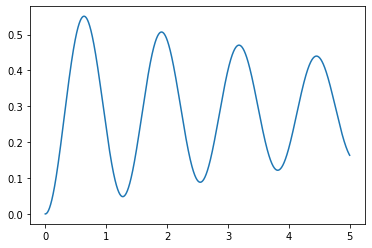

In [48]:
import cmath
import math
from matplotlib import pyplot as plt
from sympy import exp
from numpy import array, zeros

#Declaramos las condiciones iniciales
h = 0.0001
ti = 0
N = 50000
yi = 0
zi = 0
#y = zeros(N)  #La funcion zeros() devuelve un array del tamaño y tipo indicados, inicializando sus valores con ceros
#z = zeros(N)
#t = zeros(N)

#Declaramos los elementos masa - resorte - amortiguandor
m = 0.29
k = 7.03
c = 24.39

for i in range(N):
  #Declaramos la ecuacion 
  Dz = -(m)*zi - (c)*yi + (k)
  y[i] = yi + (h*zi)
  z[i] = zi + (h*Dz)
  ti = ti + h
  t[i] = ti
  yi = y[i]
  zi = z[i]
  #print(zi, yi)

#print(t)
#print(y)
plt.plot(t,y)

#Comprobamos si el sistema es estable o inestable
if c>=0 and k>=0:
  print("El sistema es estable")
  #Obtengo el factor de amortiguanto
  Cs = c / (2*(math.sqrt(m*k))) #amortiguador/2*raiz de masa por el resorte
  print("\nFactor de amortiguamiento es")
  print(f"Cs = {Cs}")

  #Evaluamos el caso del sistema
  if Cs < 1 and Cs > 0:
    print("\nEl sistema es subamortiguado")
  elif Cs ==1:
    print("\nEl sistema es criticamente amortiguado")
  elif Cs > 1:
    print("\nEl sistema esta sobreamortiguado")
else:
  print("\nEl sistema es inestable")

#Obtenemos la frecuencia natural del sistema
wn = math.sqrt(k/m)           #frecuencia natural 
print("\nFrecuencia natural")
print(f"Wn = {wn}")

#Obtengo la frecuencia amortiguada
wd = wn * (cmath.sqrt(1- (Cs)**2))

#Obtenemos la constante de tiempo
tc = 1/(Cs * wn)
print("\nLa Constante de tiempo es")
print(f"T = {tc}")

#El tiempo de estabilizacion es 
ts = 4 /(Cs * wn)
print("\nTiempo de estabilizacion")
print(f"Ts = {ts}")

#Sobrepaso maximo
Som = (1/k)*cmath.exp((-cmath.pi*Cs)/cmath.sqrt(1-(Cs)**2))
print("\nSobrepaso maximo")
print(Som)

#Calculamos el tiempo pico 
tp = math.pi / wd * -1
print("\nTiempo pico")
print(f"Tp = {tp}")

#Calculamos el tiempo de retardo delay
td = (1 + (0.7 * Cs) / wn)